In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as pyplot
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,VotingClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("D:\Data Science\Assignment\Assignment 15\Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df = pd.get_dummies(data,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)
df = df.astype(int)
df.head(6)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
5,33329,116382,0,0,0,0,0


<Axes: >

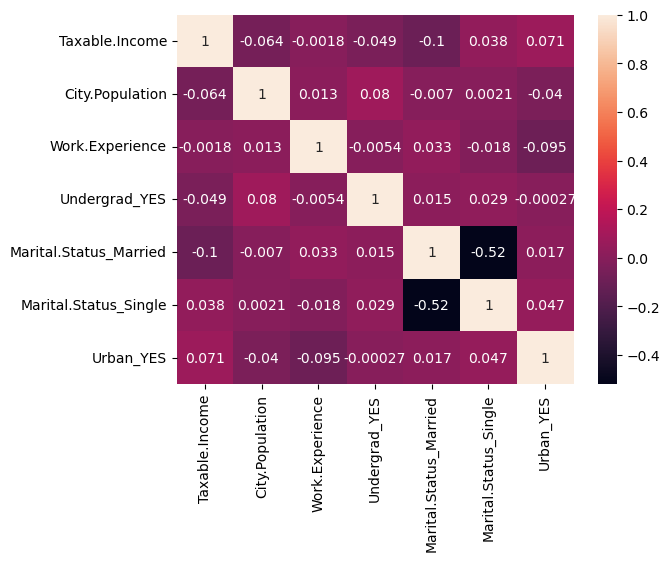

In [4]:
sns.heatmap(df.corr(),annot=True)

<Axes: ylabel='Count'>

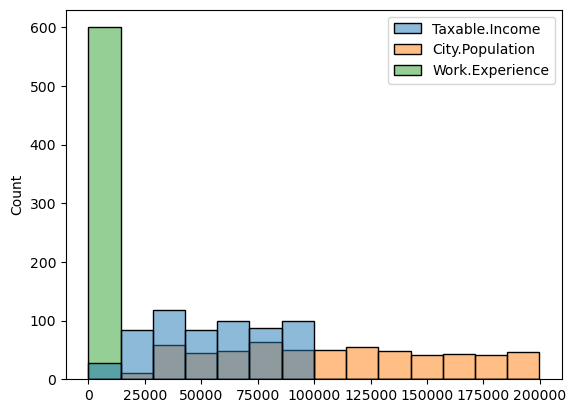

In [11]:
sns.histplot(data)

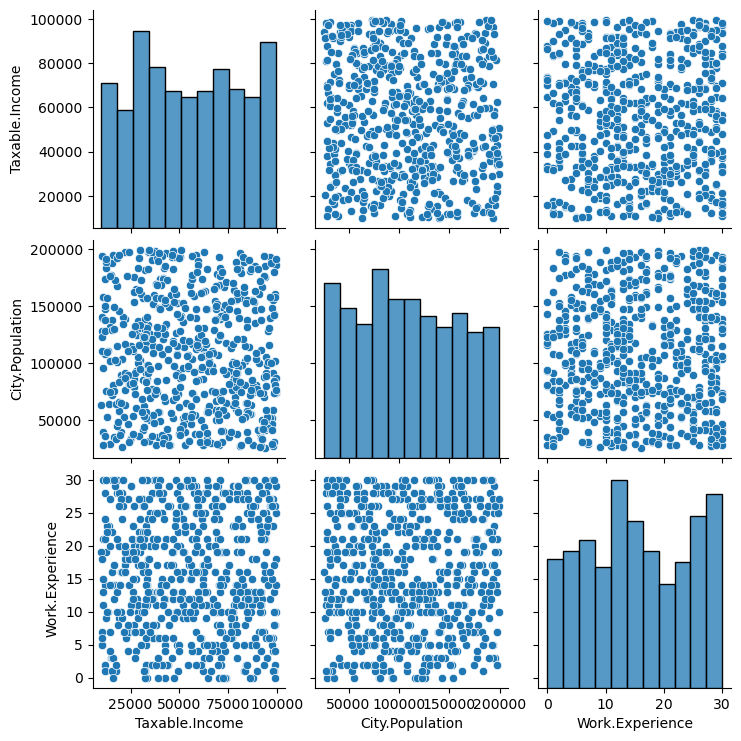

In [12]:
sns.pairplot(data)

<Axes: >

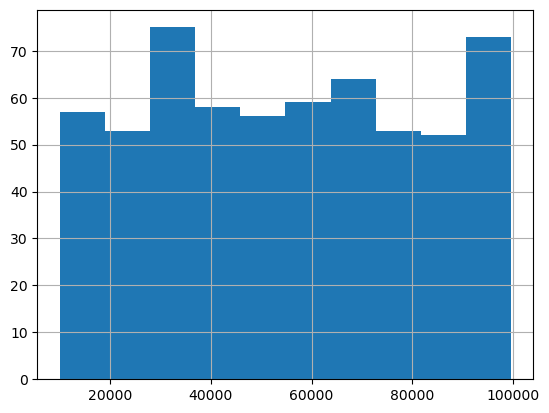

In [13]:
data['Taxable.Income'].hist()

In [5]:
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10003,55208,99619], labels = ["Risky","Good"])

In [6]:
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)
df.drop(columns='Taxable.Income',inplace=True)
df = df.astype(int)
df

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,50047,10,0,0,1,1,1
1,134075,18,1,0,0,1,0
2,160205,30,0,1,0,1,0
3,193264,15,1,0,1,1,0
4,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...
595,39492,7,1,0,0,1,1
596,55369,2,1,0,0,1,1
597,154058,0,0,0,0,1,0
598,180083,17,1,1,0,0,1


In [7]:
x = df.iloc[:,:6]
y = df.iloc[:,6:]

In [8]:
num_trees=100
max_features=3
seed=10
model=RandomForestClassifier(n_estimators=num_trees,max_features=max_features,random_state=seed)
results=cross_val_score(model,x,y,cv=KFold(n_splits=5,random_state=seed,shuffle=True))
results.mean()*100

51.66666666666667

In [9]:
model.fit(x,y)
print(model.feature_importances_)

[0.53005268 0.3160919  0.04719203 0.03035023 0.03322534 0.04308782]


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
     

estimators=[]
model3=LogisticRegression()
estimators.append(('Logistic',model3))
model4=SVC()
estimators.append(('SVC',model4))
model5=DecisionTreeClassifier()
estimators.append(('DecisionTreeClassifier',model5))
     

ensemble=VotingClassifier(estimators)
results_stack = cross_val_score(ensemble, x, y, cv=KFold(n_splits=5))
print(results_stack.mean()*100)

47.0
